# Laboratorio 7  
## Integrantes:  
Andres de la Roca  
Jun Woo Lee

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from autogluon.tabular import TabularDataset, TabularPredictor

from sklearn.metrics import confusion_matrix

## Carga de datos

In [26]:
data = pd.read_csv('diabetes.csv')

In [27]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Analisis Exploratorio

In [28]:
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [29]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [30]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
df_outcome = data['Outcome'].value_counts()

<AxesSubplot: >

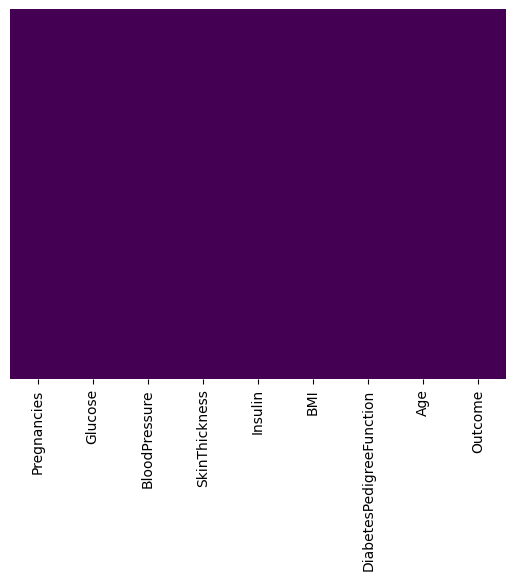

In [33]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [34]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot: >

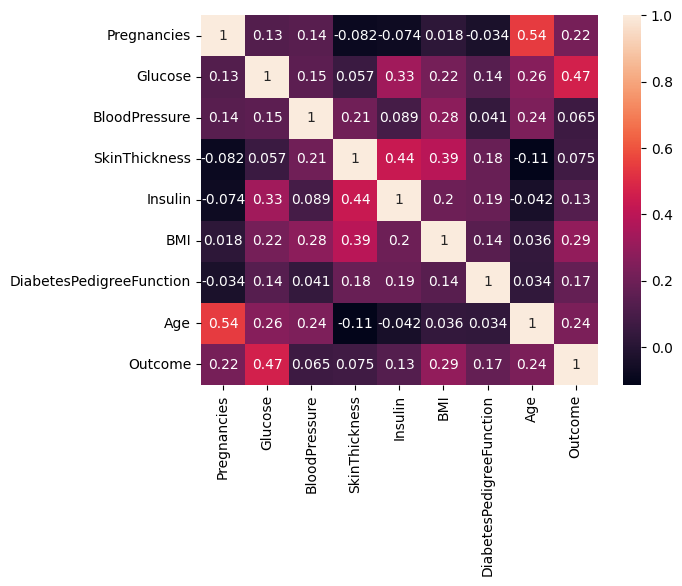

In [35]:
sns.heatmap(data.corr(), annot=True)

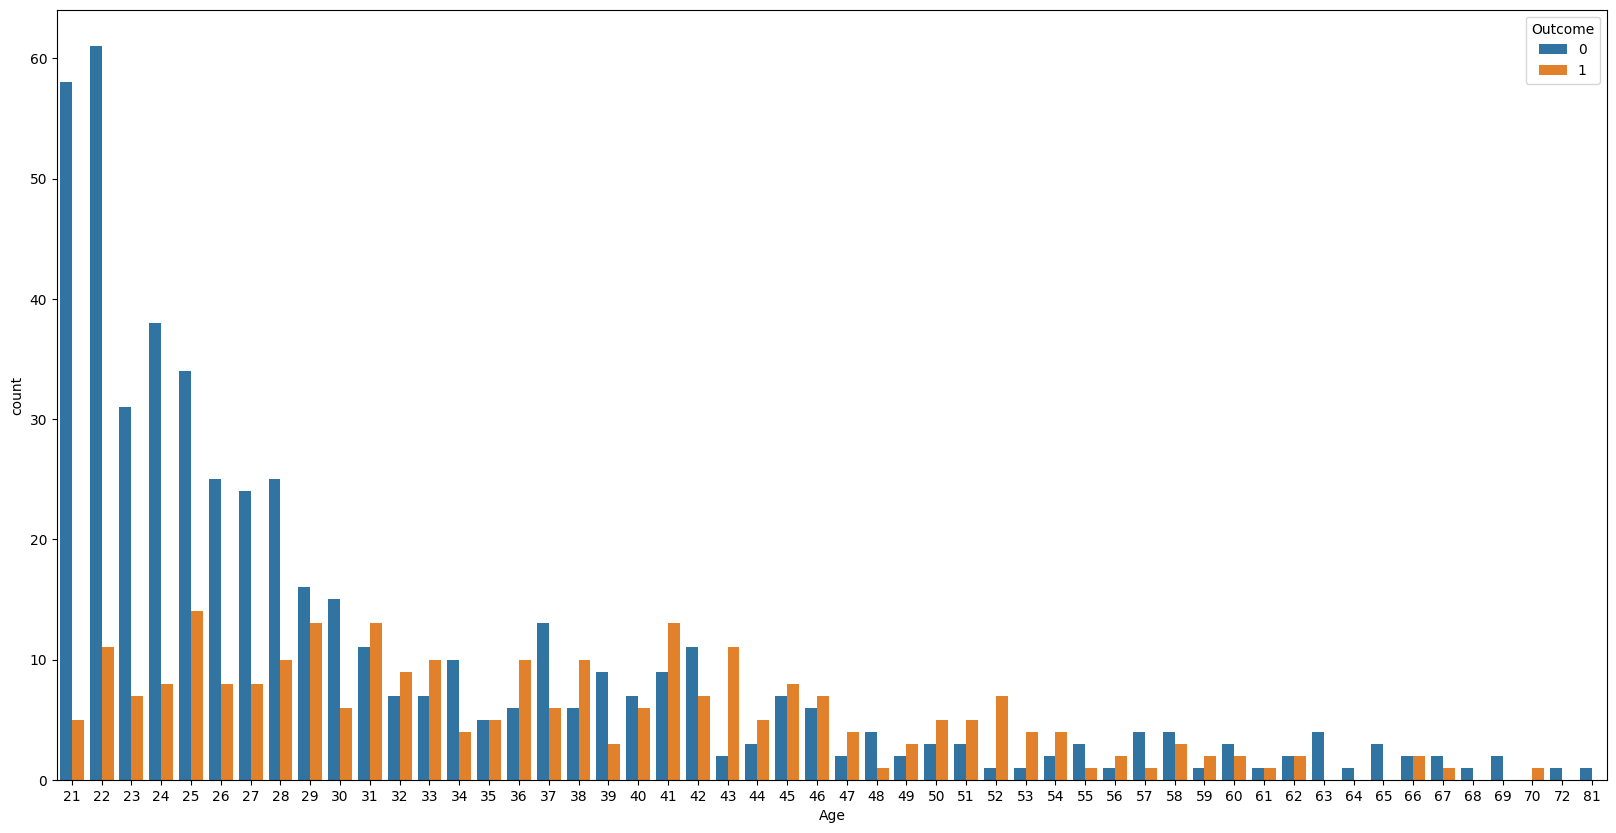

In [36]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Age', hue='Outcome', data=data)
plt.show()

## Entrenamiento con AutoGluon  

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data, test_size=0.2, random_state=0)

In [38]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
603,7,150,78,29,126,35.2,0.692,54,1
118,4,97,60,23,0,28.2,0.443,22,0
247,0,165,90,33,680,52.3,0.427,23,0
157,1,109,56,21,135,25.2,0.833,23,0
468,8,120,0,0,0,30.0,0.183,38,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
192,7,159,66,0,0,30.4,0.383,36,1
629,4,94,65,22,0,24.7,0.148,21,0
559,11,85,74,0,0,30.1,0.300,35,0


In [39]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199,76,43,0,42.9,1.394,22,1
122,2,107,74,30,100,33.6,0.404,23,0
113,4,76,62,0,0,34.0,0.391,25,0
14,5,166,72,19,175,25.8,0.587,51,1
529,0,111,65,0,0,24.6,0.660,31,0
...,...,...,...,...,...,...,...,...,...
476,2,105,80,45,191,33.7,0.711,29,1
482,4,85,58,22,49,27.8,0.306,28,0
230,4,142,86,0,0,44.0,0.645,22,1
527,3,116,74,15,105,26.3,0.107,24,0


In [40]:
predictor = TabularPredictor(label='Outcome', problem_type='binary', eval_metric='roc_auc').fit(X_train, time_limit=300, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels\ag-20231016_002216\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=6, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels\ag-20231016_002216\"
AutoGluon Version:  0.8.2
Python Version:     3.10.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   130.53 GB / 499.45 GB (26.1%)
Train Data Rows:    614
Train Data Columns: 8
Label Column: Outcome
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    15887.56 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special 

In [41]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.817427       0.236203  1.365671                0.000000           0.097083            2       True          7
1  RandomForestEntr_BAG_L1   0.814917       0.056548  0.295755                0.056548           0.295755            1       True          4
2  RandomForestGini_BAG_L1   0.813881       0.056549  0.302260                0.056549           0.302260            1       True          3
3    ExtraTreesEntr_BAG_L1   0.809425       0.062053  0.342290                0.062053           0.342290            1       True          6
4    ExtraTreesGini_BAG_L1   0.808694       0.061054  0.328283                0.061054           0.328283            1       True          5
5    KNeighborsDist_BAG_L1   0.732375       0.009508  0.003003                0.009508      

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.7264976454469045,
  'KNeighborsDist_BAG_L1': 0.7323753929052537,
  'RandomForestGini_BAG_L1': 0.8138809252415,
  'RandomForestEntr_BAG_L1': 0.8149171588776439,
  'ExtraTreesGini_BAG_L1': 0.8086940002072467,
  'ExtraTreesEntr_BAG_L1': 0.8094251206060814,
  'WeightedEnsemble_L2': 0.8174271470185256},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif_BAG_L1': 'AutogluonModels\\ag-20231016_002216\\models\\KNeighborsUnif_BAG_L1\\',
  'KNeighborsDist_BAG_L1': 'AutogluonModels\\ag-20231016_002216\\models\\KNeighborsDist_BAG_L1\\',
  '

## Evaluacion del modelo

In [50]:
leaderboard = predictor.leaderboard()
best_model = leaderboard.sort_values(by='score_val', ascending=False).iloc[0]

                     model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.817427       0.236203  1.365671                0.000000           0.097083            2       True          7
1  RandomForestEntr_BAG_L1   0.814917       0.056548  0.295755                0.056548           0.295755            1       True          4
2  RandomForestGini_BAG_L1   0.813881       0.056549  0.302260                0.056549           0.302260            1       True          3
3    ExtraTreesEntr_BAG_L1   0.809425       0.062053  0.342290                0.062053           0.342290            1       True          6
4    ExtraTreesGini_BAG_L1   0.808694       0.061054  0.328283                0.061054           0.328283            1       True          5
5    KNeighborsDist_BAG_L1   0.732375       0.009508  0.003003                0.009508           0.003003            1       True          2
6    KNeighbo

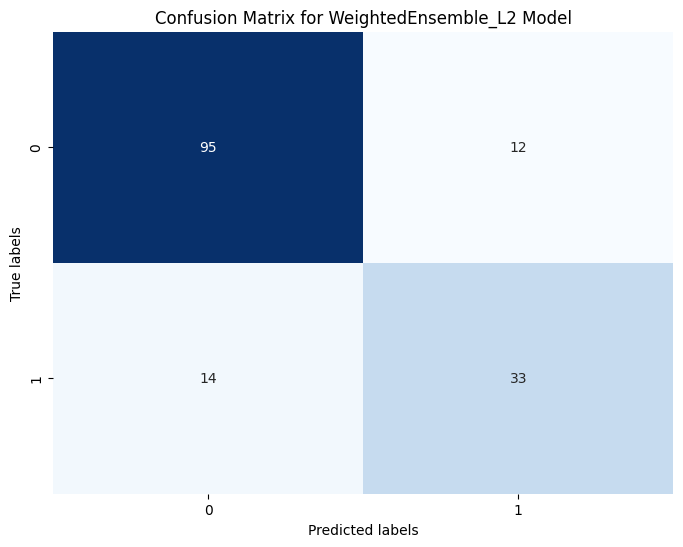

In [51]:
best_model_name = best_model['model']
y_pred_best = predictor.predict(X_test, model=best_model_name)
# Calculate and plot the confusion matrix
cm = confusion_matrix(X_test['Outcome'], y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix for {best_model_name} Model')
plt.show()

## Reflexion

Durante nuestro proyecto, nos sumergimos en la experiencia de trabajar con AutoGluon, y los resultados han sido reveladores. Desde un punto de vista técnico, la herramienta ha demostrado ser un aliado poderoso. Su capacidad para manejar automáticamente tareas como la afinación de hiperparámetros y el preprocesamiento de datos nos ha ahorrado un tiempo valioso y ha eliminado muchas de las conjeturas asociadas con el desarrollo de modelos. Además, la diversidad de algoritmos que maneja y la forma en que puede apilar modelos para mejorar el rendimiento son puntos técnicamente impresionantes.

En cuanto a la usabilidad, AutoGluon brilla por su simplicidad. Incluso para aquellos en nuestro equipo que no están completamente inmersos en el aprendizaje automático, la curva de aprendizaje fue mínima. La interfaz y documentación están bien diseñadas, facilitando la integración en nuestro flujo de trabajo.

Sin embargo, al considerar la aplicabilidad en situaciones del mundo real, surgieron algunas preocupaciones. Aunque AutoGluon es excepcionalmente eficiente, en situaciones donde se requiere una interpretación profunda del modelo o donde es esencial conocer los detalles finos del proceso, la herramienta puede no ser ideal. Su naturaleza "caja negra" puede no ser adecuada para contextos donde la transparencia y la explicabilidad son cruciales, como en decisiones médicas o financieras.

Además, si bien la herramienta es excelente para obtener soluciones rápidas, no debe reemplazar el conocimiento fundamental. En situaciones del mundo real, no siempre se puede depender únicamente de la automatización; a veces es necesario un entendimiento humano y una adaptabilidad que las herramientas de AutoML aún no pueden proporcionar.

En resumen, mientras que AutoGluon ha enriquecido nuestro proyecto y nos ha ofrecido una nueva perspectiva sobre la eficiencia en el aprendizaje automático, también nos ha recordado la importancia de no perder de vista los detalles y de ser críticos y adaptativos en situaciones del mundo real.